Inainte sa trimiti notebook-ul:

* asigura-te ca totul se executa cum trebuie. Prima oara, **restarteaza kernel-ul** (in meniu, selecteaza Kernel$\rightarrow$Restart & Run all);

* nu lasa niciun mesaj la output (`disp`, `printf`, linii care nu sunt incheiate cu `;`) in functiile pe care le scrii decat daca ti se specifica explicit sa faci acest lucru! Orice abatere va fi **depunctata automat** de grader;

* citeste instructiunile de [aici](https://github.com/radusqrt/numerical-methods/blob/master/lab_instructions.md) cu atentie;

* asigura-te ca rezolvi toate celulele in care scrie `YOUR CODE HERE` sau `YOUR ANSWER HERE` si ca iti treci numele mai jos:

In [1]:
STUDENT_NAME = "PETRUC_RARES";

---

# Laborator 10: DFT si FFT
### Autor: Radu Stochitoiu

## Problema 1

Implementati funcția ```create_fourier_matrix(N)``` ce primește $N$, numărul de sample-uri, și returnează matricea F pentru DFT.

In [2]:
function [F] = create_fourier_matrix(N)

    F = zeros(N);
    
    F(1, :) = 1;
    F(:, 1) = 1;
    
    for k = 2:N
    
        w = e^(2*pi*i/N);
        
        F(k, [2:N]) = w.^([k-1:k-1:(k-1)*(N-1)]);
    
    endfor

endfunction

error: dlmread: unable to open file 'create_fourier_matrix_5.dat'
error: 'ref' undefined near line 1 column 17
error: dlmread: unable to open file 'create_fourier_matrix_20.dat'
error: 'ref' undefined near line 1 column 17
error: dlmread: unable to open file 'create_fourier_matrix_50.dat'
error: 'ref' undefined near line 1 column 17


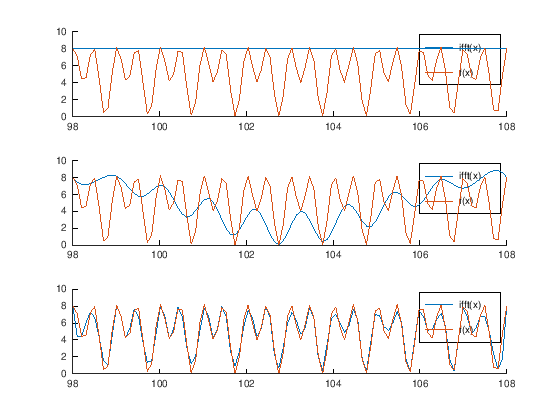

In [3]:
function [y] = f(t)
    y = 5 + 2 * cos(2 * pi * t - pi/2) + 3 * cos(4 * pi * t);
endfunction

% Test 1
N = 5;
ref = dlmread("create_fourier_matrix_5.dat");
F = create_fourier_matrix(N);
assert(norm(F - ref) < 1e-4);
samples = linspace(98, 108, N);
xx = linspace(min(samples), max(samples));

X = inv(F) * f(samples)';
yy = ifft(X) * N;

subplot(3, 1, 1);
hold
plot(xx, interp1(samples, yy, xx, 'spline'));
plot(xx, f(xx));
legend("ifft(x)", "f(x)");

% Test 2
N = 20;
ref = dlmread("create_fourier_matrix_20.dat");
F = create_fourier_matrix(N);
assert(norm(F - ref) < 1e-4);
samples = linspace(98, 108, N);
xx = linspace(min(samples), max(samples));

X = inv(F) * f(samples)';
yy = ifft(X) * N;

subplot(3, 1, 2);
hold
plot(xx, interp1(samples, yy, xx, 'spline'));
plot(xx, f(xx));
legend("ifft(x)", "f(x)");

% Test 3
N = 50;
ref = dlmread("create_fourier_matrix_50.dat");
F = create_fourier_matrix(N);
assert(norm(F - ref) < 1e-4);
samples = linspace(98, 108, N);
xx = linspace(min(samples), max(samples));

X = inv(F) * f(samples)';
yy = ifft(X) * N;

subplot(3, 1, 3);
hold
plot(xx, interp1(samples, yy, xx, 'spline'));
plot(xx, f(xx));
legend("ifft(x)", "f(x)");

## Problema 2

Implementati funcția ```create_fft_matrix(N)``` ce primește $N$, numărul de sample-uri, și returnează matricea F pentru DFT construită cu ajutorul FFT.

In [4]:
function [F] = create_fft_matrix(N)

    m = N/2;
    
    FM = zeros(m);
    FM = create_fourier_matrix(m);
    
    DM = diag(diag(FM));
    IM = eye(m);
    OM = zeros(m);
    
    Matrix1 = [IM, DM; IM, -DM];
    Matrix2 = [FM OM; OM FM];
    
    P = zeros(N);
    
    j=1;
    for i = 1:m

        P(i, j) = 1;
        j=j+2;

    endfor
    
    j=2;
    for i = m+1:N

        P(i, j)=1;
        j=j+2;

    endfor
    
    F = Matrix1*Matrix2*P;

endfunction

In [5]:
N= [8];
create_fft_matrix(N);

error: dlmread: unable to open file 'create_fft_matrix_8.dat'
error: 'ref' undefined near line 1 column 17
error: dlmread: unable to open file 'create_fft_matrix_32.dat'
error: 'ref' undefined near line 1 column 17
error: dlmread: unable to open file 'create_fft_matrix_256.dat'
error: 'ref' undefined near line 1 column 17


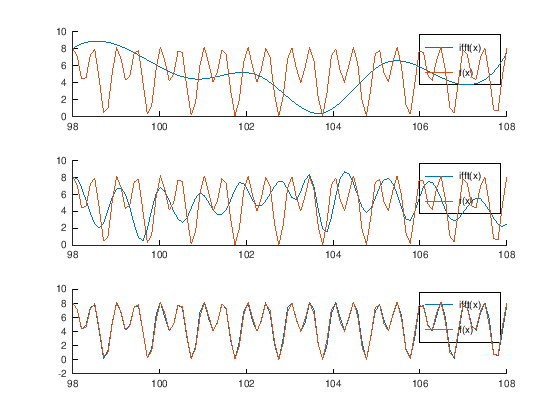

In [6]:
function [y] = f(t)
    y = 5 + 2 * cos(2 * pi * t - pi/2) + 3 * cos(4 * pi * t);
endfunction

% Test 1
N = 8;
ref = dlmread("create_fft_matrix_8.dat");
F = create_fft_matrix(N);
assert(norm(F - ref) < 1e-4);
samples = linspace(98, 108, N);
xx = linspace(min(samples), max(samples));

X = inv(F) * f(samples)';
yy = ifft(X) * N;

subplot(3, 1, 1);
hold
plot(xx, interp1(samples, yy, xx, 'spline'));
plot(xx, f(xx));
legend("ifft(x)", "f(x)");

% Test 2
N = 32;
ref = dlmread("create_fft_matrix_32.dat");
F = create_fft_matrix(N);
assert(norm(F - ref) < 1e-4);
samples = linspace(98, 108, N);
xx = linspace(min(samples), max(samples));

X = inv(F) * f(samples)';
yy = ifft(X) * N;

subplot(3, 1, 2);
hold
plot(xx, interp1(samples, yy, xx, 'spline'));
plot(xx, f(xx));
legend("ifft(x)", "f(x)");

% Test 3
N = 256;
ref = dlmread("create_fft_matrix_256.dat");
F = create_fft_matrix(N);
assert(norm(F - ref) < 1e-4);
samples = linspace(98, 108, N);
xx = linspace(min(samples), max(samples));

X = inv(F) * f(samples)';
yy = ifft(X) * N;

subplot(3, 1, 3);
hold
plot(xx, interp1(samples, yy, xx, 'spline'));
plot(xx, f(xx));
legend("ifft(x)", "f(x)");